<a href="https://colab.research.google.com/github/ipavlopoulos/paremia/blob/main/proverbs_chord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
import pandas as pd
init_notebook_mode(connected=True)

In [3]:
proverbs_url = 'https://raw.githubusercontent.com/ipavlopoulos/paremia/main/data/duplicates_geolocated.csv'
widespread_proverbs = pd.read_csv(proverbs_url); widespread_proverbs.sample(2)

,text,place,place_num,area,area_num,latlon
247,Έρημα τα τζίντζινα και σκοτεινά τα Βέρροια,"{'Ημαθία>Βασσαράς', 'Πόντος>Οινόη'}",2,"{'Ημαθία', 'Πόντος'}",2,"[(40.51703795, 22.18071972652394), (40.0850088..."
647,Αγόραζε και μην πουλής,"{'Αμοργός', 'Επτάνησος', 'Λακωνία>Σπάρτη'}",3,"{'Αμοργός', 'Επτάνησος', 'Λακωνία'}",3,"[(36.85252415, 25.89848696771565), (38.8351105..."


In [4]:
from ast import literal_eval # get it back to what it was
widespread_proverbs.latlon = widespread_proverbs.latlon.apply(literal_eval)
widespread_proverbs.area = widespread_proverbs.area.apply(literal_eval)

In [5]:
# filter proverbs located in two areas only
doubleplaced = widespread_proverbs[widespread_proverbs.latlon.apply(len)==2]

In [6]:
import folium
from folium import Choropleth, Circle, CircleMarker, Marker # not needed yet
from folium.plugins import MarkerCluster # ditto

m = folium.Map(location=[39.0742, 21.8243], zoom_start=6, tiles="cartodb positron")
for i in range(doubleplaced.shape[0]):
    # get the coordinates of each area for this proverb
    loc = doubleplaced.iloc[i].latlon
    folium.PolyLine(loc, color='red', weight=1, opacity=0.025
                   ).add_to(m)
m

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
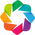

In [7]:
import holoviews as hv
from holoviews import opts, dim
import holoviews.plotting.bokeh
hv.extension('bokeh')
hv.output(size=200)

In [8]:
node_names = {loc:i for i,loc in enumerate(doubleplaced.area.explode().unique())}
edges={}
for i in range(doubleplaced.shape[0]):
    loc1, loc2 = doubleplaced.iloc[i].area
    l1, l2 = node_names[loc1], node_names[loc2]
    key = str({l1,l2}) # hashing while keeping unique order
    if key not in edges:
        edges[key] = 1
    else:
        edges[key] += 1

In [9]:
matrix_pd = pd.DataFrame([(list(literal_eval(m))[0], list(literal_eval(m))[1], edges[m]) for m in edges],
                         columns=('source', 'target', 'value'))
matrix_pd.sample()

,source,target,value
65,26,10,11


In [45]:
loc_name = {'Ήπειρος':'Epirus', 'Αιτωλία':'Etolia', 'Αμοργός':'Amorgos', 'Ανατολική Θράκη': 'East Thrace',
            'Αρκαδία':'Arcadia', 'Αχαΐα':'Achaia', 'Επτάνησος':'Eptanisos', 'Εύβοια':'Eyvoia', 'Θεσπρωτία':'Thesprotia',
             'Θράκη': 'Thrace', 'Ιωάννινα':'Ioannina', 'Κάρπαθος':'Karpathos', 'Κεφαλληνία':'Kefalinia', 'Κρήτη':'Crete',
            'Κύπρος':'Cyprus', 'Λέσβος':'Lesvos', 'Λακωνία':'Laconia', 'Μακεδονία':'Macedonia', 'Μικρά Ασία':'Asia Minor',
            'Νάξος':'Naxos', 'Πόντος':'Pontos', 'Ρόδος':'Rodos', 'Σκύρος':'Skyros',
            'Νίσυρος': 'Nisyros', 'Θήρα (Σαντορίνη)': 'Thera', 'Θεσσαλία': 'Thessalia', 'Κορινθία': 'Korinthia',
            'Δαρδανέλλια (Ελλήσποντος)': 'Dardanellia', 'Σίφνος': 'Sifnos', 'Βόρειος Ήπειρος': 'North Epirus',
            'Κέρκυρα': 'Corfu', 'Κως': 'Kos', 'Άγιον Όρος': 'Agion Oros', 'Άνδρος': 'Andros', 'Άρτα': 'Arta', 'Ίμβρος': 'Imvros', 'Αίγινα': 'Egina',
            'Αδριανούπολη': 'Adrianoupoli', 'Αερόπολη': 'Aeropoli', 'Αθήνα': 'Athens', 'Αιτωλοακαρνανία': 'Aitoloakarnania',
            'Ακαρνανία': 'Akarnania', 'Ανάφη': 'Anafi', 'Ανατολική Κρήτη': 'East Crete', 'Ανδρίτσαινα Ολυμπίου': 'Andritsena Olympiou',
            'Αργολίδα': 'Argolida', 'Αστυπάλαια': 'Astypalaia', 'Αττική': 'Attica', 'Βοιωτία': 'Voiotia', 'Ευρυτανία': 'Eurytania',
            'Ζάκυνθος': 'Zakynthos', 'Ηλεία': 'Ileia', 'Ημαθία': 'Emathia', 'Θεσσαλονίκη': 'Thessaloniki', 'Ιθάκη': 'Ithaca',
            'Ικαρία': 'Icaria', 'Κάλυμνος': 'Calymnos', 'Κάσος': 'Casos', 'Κέα': 'Kea', 'Καππαδοκία': 'Cappadokia',
            'Καρδίτσα': 'Karditsa', 'Καστελλόριζο (Μεγίστη)': 'Castellorizo', 'Καστοριά': 'Castoria', 'Κοζάνη': 'Cozani',
            'Κύθηρα': 'Cethera', 'Κύθνος': 'Cythnos', 'Λάρισα': 'Larisa', 'Λέρος': 'Leros', 'Λήμνος': 'Lemnos', 'Λαμία': 'Lamia', 'Λευκάδα': 'Leukada',
            'Μάλγαρα': 'Malgara', 'Μάνη': 'Mani', 'Μήλος': 'Milos', 'Μαγνησία': 'Magnesia', 'Μεσσηνία': 'Messenia', 'Μύκονος': 'Myconos',
            'Νάουσα': 'Naousa', 'Ολυμπία': 'Olympia', 'Πάρος': 'Paros', 'Πέλλα': 'Pella', 'Πήλιο': 'Pilio', 'Τήνος': 'Tinos', 'Παξοί': 'Paxoi',
            'Παρνασσός': 'Parnassos', 'Πελοπόννησος': 'Peloponnese', 'Πρέβεζα': 'Preveza', 'Ρούμελη': 'Roumeli', 'Σάμος': 'Samos', 'Σέρρες': 'Serres', 'Σαμοθράκη': 'Samothrace',
            'Σμύρνη':'Smyrni', 'Στερεά Ελλάδα': 'Sterea Ellada', 'Σύμη': 'Symi', 'Σύρος': 'Syros', 'Τήλος': 'Telos', 'Τριφυλία': 'Trifylllia',
            'Φθιώτιδα': 'Fthiotida', 'Φιλιππούπολη': 'Filippoupoli', 'Φωκίδα': 'Fokida', 'Χίος': 'Chios'}

In [46]:
nodes_pd = pd.DataFrame({'nodes': [loc_name[n] for n in node_names]},
                        index=[node_names[n] for n in node_names])
nodes_pd.sample()

,nodes
13,Skyros


In [58]:
%%capture
#add node labels
nodes = hv.Dataset(nodes_pd, 'index')
#create chord object
chord = hv.Chord((matrix_pd, nodes)).select(value=(5, None))
#customization of chart
chord.opts(opts.Chord(cmap='Category20',
                      edge_cmap='Category20',
                      edge_color=dim('source').str(),
                      label_text_font_size='12pt',
                      labels='nodes',
                      node_color=dim('index').str()))

In [59]:
from bokeh.plotting import show, output_file
output_file('chord.html')
show(hv.render(chord))

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning:

'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning:

'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning:

'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning:

'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transform_reference' instead.

/usr/local/lib/python3.10/dist-packages/holoviews/core/util.py:1585: PanelDeprecationWarning:

'param_value_if_widget' is deprecated and will be removed in version 1.4, use 'transf

In [53]:
doubleplaced.area.explode().value_counts()[:5]

Λακωνία    620
Ήπειρος    326
Αρκαδία    260
Αχαΐα      234
Θράκη      233
Name: area, dtype: int64